In [253]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import cufflinks as cf
#cf.go_offline()
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import rcParams
from _plotly_future_ import v4_subplots

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
from sklearn.manifold import TSNE

import plotly as pl
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sklearn

import sklearn.linear_model as linear_model
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import HTML, display
from sklearn.model_selection import train_test_split
import category_encoders as ce
pd.options.display.max_columns = None
import missingno as msno
from numpy.random import choice
np.random.seed(99)

In [2]:
%store -r nnn_newdf

In [4]:
df=nnn_newdf.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 30 columns):
p_gen         9971 non-null object
p_yr          9971 non-null float64
p_race        9971 non-null object
p_born        9971 non-null object
p_citz        9971 non-null object
p_marl        9971 non-null object
p_ilang       9971 non-null object
p_iprox       9971 non-null object
p_intrp       9971 non-null object
f_ilang       9971 non-null object
f_iprox       9971 non-null object
f_intrp       9971 non-null object
mec_lang      9971 non-null object
mec_prox      9971 non-null object
mec_intrp     9971 non-null object
aca_lang      9971 non-null object
hh_size       9971 non-null int64
fm_size       9971 non-null int64
hh_chld5      9971 non-null float64
hh_chld617    9971 non-null float64
hh_adult      9971 non-null float64
hh_gend       9971 non-null object
hh_age        9971 non-null int64
hh_born       9971 non-null object
hh_edu        9971 non-null float64
hh_marl       99

In [22]:
cat_df =df.select_dtypes(include=['object']).copy()
notcat_df=df.select_dtypes(include=['int64','float64']).copy()

In [10]:
cat_df.head()

,p_gen,p_race,p_born,p_citz,p_marl,p_ilang,p_iprox,p_intrp,f_ilang,f_iprox,f_intrp,mec_lang,mec_prox,mec_intrp,aca_lang,hh_gend,hh_born,hh_marl
0,male,nhis_white,born_us,yes_citz,p_married,p_eng_lang_int,p_prox_res_no,p_intrp_no,fam_lan_int_eng,ff_prox_no,fam_intrp_no,mec_lang_eng,mec_prox_no,mec_intrp_no,aca_lan_int_eng,hh_gend_male,hh_born_us,hh_married
1,male,nhis_white,born_not_us,not_citz,p_divorced,p_eng_lang_int,p_prox_res_no,p_intrp_no,fam_lan_int_eng,ff_prox_no,fam_intrp_no,mec_lang_eng,mec_prox_no,mec_intrp_no,aca_lan_int_eng,hh_gend_male,hh_born_not_us,hh_divorced
2,male,nhis_white,born_us,yes_citz,p_married,p_eng_lang_int,p_prox_res_no,p_intrp_no,fam_lan_int_eng,ff_prox_no,fam_intrp_no,mec_lang_eng,mec_prox_no,mec_intrp_no,aca_lan_int_eng,hh_gend_female,hh_born_us,hh_married
3,female,nhis_white,born_us,yes_citz,p_liv_partn,p_eng_lang_int,p_prox_res_no,p_intrp_no,fam_lan_int_eng,ff_prox_no,fam_intrp_no,mec_lang_eng,mec_prox_no,mec_intrp_no,aca_lan_int_eng,hh_gend_female,hh_born_us,hh_liv_partn
4,female,nhis_black,born_us,yes_citz,p_divorced,p_eng_lang_int,p_prox_res_no,p_intrp_no,fam_lan_int_eng,ff_prox_no,fam_intrp_no,mec_lang_eng,mec_prox_no,mec_intrp_no,aca_lan_int_eng,hh_gend_female,hh_born_us,hh_divorced


In [91]:
encoder =ce.BackwardDifferenceEncoder()
df_bd=encoder.fit_transform(cat_df)
                            
onehot=pd.get_dummies(cat_df)                            

In [207]:
finaldf=pd.concat([df_bd,notcat_df],axis=1)

In [94]:
finaldf.columns.values

array(['p_gen_female', 'p_gen_male', 'p_race_his_mex_americans',
       'p_race_his_others', 'p_race_nhis_asian', 'p_race_nhis_black',
       'p_race_nhis_others', 'p_race_nhis_white', 'p_born_born_not_us',
       'p_born_born_us', 'p_citz_not_citz', 'p_citz_yes_citz',
       'p_marl_p_divorced', 'p_marl_p_liv_partn', 'p_marl_p_married',
       'p_marl_p_never_married', 'p_marl_p_separated', 'p_marl_p_widowed',
       'p_ilang_p_eng_lang_int', 'p_ilang_p_spa_lang_int',
       'p_iprox_p_prox_res_no', 'p_iprox_p_prox_res_yes',
       'p_intrp_p_intrp_no', 'p_intrp_p_intrp_yes',
       'f_ilang_fam_lan_int_eng', 'f_ilang_fam_lan_int_spa',
       'f_iprox_ff_prox_no', 'f_iprox_ff_prox_yes',
       'f_intrp_fam_intrp_no', 'f_intrp_fam_intrp_yes',
       'mec_lang_mec_lang_eng', 'mec_lang_mec_lang_spa',
       'mec_prox_mec_prox_no', 'mec_prox_mec_prox_yes',
       'mec_intrp_mec_intrp_no', 'mec_intrp_mec_intrp_yes',
       'aca_lang_aca_lan_int_asi', 'aca_lang_aca_lan_int_eng',
       'aca

In [162]:
X_train=finaldf[['p_gen_female', 'p_gen_male', 'p_race_his_mex_americans',
       'p_race_his_others', 'p_race_nhis_asian', 'p_race_nhis_black',
       'p_race_nhis_others', 'p_race_nhis_white', 'p_born_born_not_us',
       'p_born_born_us', 'p_citz_not_citz', 'p_citz_yes_citz',
       'p_marl_p_divorced', 'p_marl_p_liv_partn', 'p_marl_p_married',
       'p_marl_p_never_married', 'p_marl_p_separated', 'p_marl_p_widowed',
       'p_ilang_p_eng_lang_int', 'p_ilang_p_spa_lang_int',
       'p_iprox_p_prox_res_no', 'p_iprox_p_prox_res_yes',
       'p_intrp_p_intrp_no', 'p_intrp_p_intrp_yes',
       'f_ilang_fam_lan_int_eng', 'f_ilang_fam_lan_int_spa',
       'f_iprox_ff_prox_no', 'f_iprox_ff_prox_yes',
       'f_intrp_fam_intrp_no', 'f_intrp_fam_intrp_yes',
       'mec_lang_mec_lang_eng', 'mec_lang_mec_lang_spa',
       'mec_prox_mec_prox_no', 'mec_prox_mec_prox_yes',
       'mec_intrp_mec_intrp_no', 'mec_intrp_mec_intrp_yes',
       'aca_lang_aca_lan_int_asi', 'aca_lang_aca_lan_int_eng',
       'aca_lang_aca_lan_int_spa', 'hh_gend_hh_gend_female',
       'hh_gend_hh_gend_male', 'hh_born_hh_born_not_us',
       'hh_born_hh_born_us', 'hh_marl_hh_divorced',
       'hh_marl_hh_liv_partn', 'hh_marl_hh_married',
       'hh_marl_hh_never_married', 'hh_marl_hh_separated',
       'hh_marl_hh_widowed', 'p_yr', 'hh_size', 'fm_size', 'hh_chld5',
       'hh_chld617', 'hh_adult', 'hh_age', 'hh_edu', 'hh_sedu',
       'f_inc', 'f_pir']]
y_train=finaldf[['hh_inco']]

In [215]:
X_train=finaldf[[ 'p_gen_0', 'p_race_0', 'p_race_1', 'p_race_2',
       'p_race_3', 'p_race_4', 'p_born_0', 'p_citz_0', 'p_marl_0',
       'p_marl_1', 'p_marl_2', 'p_marl_3', 'p_marl_4', 'p_ilang_0',
       'p_iprox_0', 'p_intrp_0', 'f_ilang_0', 'f_iprox_0', 'f_intrp_0',
       'mec_lang_0', 'mec_prox_0', 'mec_intrp_0', 'aca_lang_0',
       'aca_lang_1', 'hh_gend_0', 'hh_born_0', 'hh_marl_0', 'hh_marl_1',
       'hh_marl_2', 'hh_marl_3', 'hh_marl_4', 'p_yr', 'hh_size',
       'fm_size', 'hh_chld5', 'hh_chld617', 'hh_adult', 'hh_age',
       'hh_edu', 'hh_sedu', 'f_inc', 'f_pir']]
y_train=finaldf[['hh_inco']]

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X_train, y_train, random_state=0)

In [259]:


# importing required libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model = LogisticRegression(solver="lbfgs",multi_class="multinomial",C=100)

# fit the model with the training data
model.fit(X_train,y_train)

# coefficeints of the trained model
print('Coefficient of model :', model.coef_)

# intercept of the model
print('Intercept of model',model.intercept_)

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)


# predict the target on the train dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test) 

# Accuray Score on train dataset
accuracy_test= accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)



Coefficient of model : [[-3.01482609e-02  2.28565940e-01  3.80173048e-01 -6.57868102e-01
   5.44958151e-01 -8.64408213e-02 -6.11748831e+00  5.07147932e+00
  -1.57773002e+01 -8.04716823e+00]
 [-2.28129808e-01  8.68215155e-02  2.53204292e-01 -4.30093638e-01
   2.65160268e-01  1.70240998e-01 -5.47957850e+00  4.45965744e+00
  -1.13832176e+01 -5.17358372e+00]
 [-2.49654679e-01  2.51401403e-01  2.32308901e-01 -4.23192051e-01
   2.21453963e-01  9.22812536e-02 -5.25843860e+00  4.14585183e+00
  -7.58722979e+00 -4.62326380e+00]
 [-6.65019479e-02  1.19348478e-01  1.92641971e-01 -3.09337110e-01
   1.09301779e-01  1.22584247e-01 -3.77202939e+00  2.95107502e+00
  -4.92203794e+00 -3.39673450e+00]
 [ 3.44035950e-02  1.06041947e-01  2.68048553e-01 -5.06194738e-01
   1.58207580e-01  1.33943718e-01 -2.71677182e+00  1.86123372e+00
  -1.82210047e+00 -3.51579299e+00]
 [-3.87731235e-03  6.70140350e-02  1.01088167e-02 -2.33976176e-02
  -5.23717884e-02 -1.82586226e-03 -1.79422094e+00  1.07731172e+00
   5.29010

Text(0, 0.5, 'Coefficient magnitude')

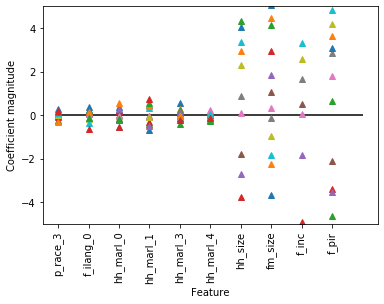

In [252]:
plt.plot(model.coef_.T,'^', label="C=100")
plt.xticks(range(X_train.shape[1]), ['p_race_3', 'f_ilang_0', 'hh_marl_0', 'hh_marl_1', 'hh_marl_3', 'hh_marl_4', 'hh_size', 'fm_size', 'f_inc', 'f_pir'], rotation=90)
plt.hlines(0, 0, X_train.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")


([<matplotlib.axis.XTick at 0x1b31524fef0>,
 <a list of 10 Text xticklabel objects>)

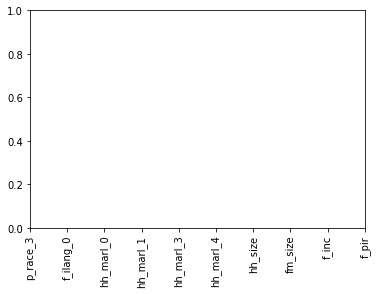

In [195]:
pd.DataFrame(np.abs(np.array(y_test).T-predict_test)).T[0].value_counts()

0.0     1722
1.0      611
2.0       79
5.0       25
3.0       25
4.0       18
6.0        7
7.0        4
13.0       1
10.0       1
Name: 0, dtype: int64

In [188]:
predict_train

array([ 6., 15., 10., ..., 15.,  7., 15.])

In [183]:
pd.DataFrame(predict_train)[0].value_counts()

15.0    1439
6.0      993
7.0      906
14.0     717
8.0      575
9.0      513
4.0      479
3.0      460
5.0      362
10.0     311
2.0      292
1.0      252
12.0     118
13.0      61
Name: 0, dtype: int64

In [186]:
y_train['hh_inco'].value_counts()

15.0    1292
6.0      812
7.0      779
14.0     737
8.0      615
9.0      512
5.0      507
4.0      488
3.0      437
10.0     395
2.0      307
12.0     239
1.0      228
13.0     130
Name: hh_inco, dtype: int64

In [225]:
scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [147]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=30, step=10, verbose=5)
rfe_selector.fit(X_train, y_train)
rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 60 features.
Fitting estimator with 50 features.
Fitting estimator with 40 features.
30 selected features


In [257]:
print(rfe_feature)

['p_gen_male', 'p_born_born_us', 'p_citz_not_citz', 'p_citz_yes_citz', 'p_ilang_p_eng_lang_int', 'p_ilang_p_spa_lang_int', 'p_iprox_p_prox_res_no', 'p_iprox_p_prox_res_yes', 'p_intrp_p_intrp_no', 'p_intrp_p_intrp_yes', 'f_ilang_fam_lan_int_eng', 'f_ilang_fam_lan_int_spa', 'f_iprox_ff_prox_no', 'f_intrp_fam_intrp_no', 'f_intrp_fam_intrp_yes', 'mec_lang_mec_lang_eng', 'mec_prox_mec_prox_no', 'mec_prox_mec_prox_yes', 'mec_intrp_mec_intrp_no', 'mec_intrp_mec_intrp_yes', 'aca_lang_aca_lan_int_spa', 'hh_gend_hh_gend_female', 'hh_gend_hh_gend_male', 'hh_born_hh_born_not_us', 'hh_marl_hh_married', 'hh_marl_hh_separated', 'hh_size', 'fm_size', 'f_inc', 'f_pir']


In [117]:
result=pd.DataFrame(np.abs(np.array(y_test).reshape(2493)-predict_test))

In [130]:
X_train=finaldf[['f_ilang_fam_lan_int_eng', 'f_ilang_fam_lan_int_spa', 'f_iprox_ff_prox_no', 'f_intrp_fam_intrp_yes', 'mec_prox_mec_prox_no', 'hh_born_hh_born_not_us', 'hh_size', 'fm_size', 'f_inc', 'f_pir']]
y_train=finaldf[['hh_inco']]


In [138]:
X_train=finaldf[['p_citz_not_citz', 'p_citz_yes_citz', 'p_ilang_p_spa_lang_int', 'p_iprox_p_prox_res_no', 'p_intrp_p_intrp_yes', 'f_ilang_fam_lan_int_eng', 'f_ilang_fam_lan_int_spa', 'f_iprox_ff_prox_no', 'f_intrp_fam_intrp_yes', 'mec_prox_mec_prox_no', 'mec_prox_mec_prox_yes', 'mec_intrp_mec_intrp_yes', 'aca_lang_aca_lan_int_spa', 'hh_gend_hh_gend_female', 'hh_gend_hh_gend_male', 'hh_marl_hh_married', 'hh_size', 'fm_size', 'f_inc', 'f_pir']]

y_train=finaldf[['hh_inco']]

In [149]:
X_train=finaldf[['p_gen_male', 'p_born_born_us', 'p_citz_not_citz', 'p_citz_yes_citz', 'p_ilang_p_eng_lang_int', 'p_ilang_p_spa_lang_int', 'p_iprox_p_prox_res_no', 'p_iprox_p_prox_res_yes', 'p_intrp_p_intrp_no', 'p_intrp_p_intrp_yes', 'f_ilang_fam_lan_int_eng', 'f_ilang_fam_lan_int_spa', 'f_iprox_ff_prox_no', 'f_intrp_fam_intrp_no', 'f_intrp_fam_intrp_yes', 'mec_lang_mec_lang_eng', 'mec_prox_mec_prox_no', 'mec_prox_mec_prox_yes', 'mec_intrp_mec_intrp_no', 'mec_intrp_mec_intrp_yes', 'aca_lang_aca_lan_int_spa', 'hh_gend_hh_gend_female', 'hh_gend_hh_gend_male', 'hh_born_hh_born_not_us', 'hh_marl_hh_married', 'hh_marl_hh_separated', 'hh_size', 'fm_size', 'f_inc', 'f_pir']]
                
y_train=finaldf[['hh_inco']]                

In [216]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), max_features=15)
embeded_lr_selector.fit(X_train, y_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_train.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

15 selected features


In [217]:
print(embeded_lr_feature)

['p_race_0', 'p_race_1', 'p_race_3', 'p_ilang_0', 'f_ilang_0', 'f_intrp_0', 'hh_born_0', 'hh_marl_0', 'hh_marl_1', 'hh_marl_3', 'hh_marl_4', 'hh_size', 'fm_size', 'f_inc', 'f_pir']


In [157]:
X_train=finaldf[['f_ilang_fam_lan_int_spa', 'f_iprox_ff_prox_no', 'f_intrp_fam_intrp_yes', 'hh_born_hh_born_not_us', 'hh_marl_hh_married', 'hh_marl_hh_never_married', 'hh_size', 'fm_size', 'f_inc', 'f_pir']]
y_train=finaldf[['hh_inco']]

In [223]:
X_train=finaldf[['p_race_his_others', 'p_race_nhis_asian', 'p_race_nhis_black', 'f_ilang_fam_lan_int_eng', 'f_ilang_fam_lan_int_spa', 'f_iprox_ff_prox_no', 'f_intrp_fam_intrp_yes', 'mec_prox_mec_prox_no', 'mec_prox_mec_prox_yes', 'aca_lang_aca_lan_int_spa', 'hh_born_hh_born_not_us', 'hh_marl_hh_liv_partn', 'hh_marl_hh_married', 'hh_marl_hh_never_married', 'hh_marl_hh_separated', 'hh_marl_hh_widowed', 'hh_size', 'fm_size', 'f_inc', 'f_pir']]

y_train=finaldf[['hh_inco']]

KeyError: "['f_iprox_ff_prox_no', 'p_race_his_others', 'hh_marl_hh_liv_partn', 'hh_marl_hh_never_married', 'aca_lang_aca_lan_int_spa', 'hh_marl_hh_married', 'hh_marl_hh_widowed', 'f_ilang_fam_lan_int_eng', 'p_race_nhis_black', 'p_race_nhis_asian', 'hh_born_hh_born_not_us', 'mec_prox_mec_prox_no', 'hh_marl_hh_separated', 'f_intrp_fam_intrp_yes', 'mec_prox_mec_prox_yes', 'f_ilang_fam_lan_int_spa'] not in index"

In [224]:
X_train=finaldf[['p_race_3', 'f_ilang_0', 'hh_marl_0', 'hh_marl_1', 'hh_marl_3', 'hh_marl_4', 'hh_size', 'fm_size', 'f_inc', 'f_pir']]
y_train=finaldf[['hh_inco']]

In [219]:
X_train=finaldf[['p_race_0', 'p_race_1', 'p_race_3', 'p_ilang_0', 'f_ilang_0', 'f_intrp_0', 'hh_born_0', 'hh_marl_0', 'hh_marl_1', 'hh_marl_3', 'hh_marl_4', 'hh_size', 'fm_size', 'f_inc', 'f_pir']]
y_train=finaldf[['hh_inco']]

(9971, 44)